# Fibrations and subpolytopes

In this notebook we will look at subpolytopes, enhancement diagrams, Kollar divisors and fibrations of 4d reflexive polytopes.

In [1]:
#from fiberpolytope import fiberpolytope
load('fiberpolytope.sage')

## F2 x P2

Let's study the reflexive polytope corresponding to an F2 x P2 direct product ambient space.

In [2]:
vertices1 = [[-1, -1, 0,0],[1, 0, 0,0], [0, 1, 0,0],
             [0,0,-1, -2], [0,0,0, -1] ,[0,0,1, 0], [0,0,0, 1]]
M = fiberpolytope(vertices1)

we can find all 2d subpolytopes using an [algorithm](http://ctp.lns.mit.edu/wati/data/fibers/fibers.jl) by Huang and Taylor.

In [3]:
help(M.find_subpolytopes)

Help on method find_subpolytopes in module __main__:

find_subpolytopes() method of __main__.fiberpolytope instance
    Finds all subpolytopes.
    Only supported for 4d polytopes.
    A straightforward translation of the julia code to python
    from 1809.05160. The Julia code is due to Huang and Taylor 
    and can be found here:
        http://ctp.lns.mit.edu/wati/data/fibers/fibers.jl
    
    Returns
    -------
        nested list of vertices corresponding to the subpolytopes



In [4]:
M.find_subpolytopes()

[array([[-1, -1,  0,  0],
        [ 1,  0,  0,  0],
        [ 0,  1,  0,  0],
        [ 0,  0,  0,  0]]), array([[ 0,  0, -1, -2],
        [ 0,  0,  0,  1],
        [ 0,  0,  1,  0],
        [ 0,  0,  0, -1],
        [ 0,  0,  0,  0]])]

We easily recover the two ambient space factors of P2 and F2.

Other tools to study fibrations utilize Kollar divisors. For that we reuquire second Chern class and triple intersection numbers of the underlying manifold, these are dependent on the triangulation chosen.

We can set a triangulation with:

In [5]:
M.set_triangulation()

fiberpolytope:INFO:No triangulation specified, picking first triangulation.


the triple intersection numbers are

In [6]:
triple = M.triple_intersection()
triple

array([[[0, 2, 4],
        [2, 0, 3],
        [4, 3, 6]],

       [[2, 0, 3],
        [0, 0, 0],
        [3, 0, 0]],

       [[4, 3, 6],
        [3, 0, 0],
        [6, 0, 0]]], dtype=int32)

we find Kollar divisors with

In [7]:
help(M.find_kollar)

Help on method find_kollar in module __main__:

find_kollar(triangulation=[], r_coeff=-1) method of __main__.fiberpolytope instance
    Finds Kollar divisors with positive coefficients for the 
    generator of the Kähler cone. Only works for 3-folds.
    
    
    
    Parameters
    ----------
    triangulation : sage.triangulation
        use the internal points to not mess with notation, by default []
    r_coeff : int, optional
        range of coefficients, by default -1 
        (if -1 only checks the J divisors spanning the Kähler cone)
    
    Returns
    -------
    list/arrays[int]
        list of divisors satisfying Kollar criteria.



In [8]:
Kollar = M.find_kollar()
Kollar

fiberpolytope:INFO:The following divisors satisfy the three necessary Kollar conditions:
 [[x6], [x5], [2*x5 + x7]]


[[x6], [x5], [2*x5 + x7]]

```python
M.find_kollar()
```

uses the function 

```python
M.is_kollar(divisor)
```

under the hood and considers sums of the generators of Kähler cone. These can be accessed by

In [9]:
M.J

[[x6], [x5], [2*x5 + x7]]

In [10]:
for d in M.J:
    print(M.is_kollar(d))

True
True
True


we can also study enhancement [diagrams (1910.02963)](https://arxiv.org/abs/1910.02963).

In [11]:
help(M.enhancement_diagram)

Help on method enhancement_diagram in module __main__:

enhancement_diagram(triple, fname, alpha=0.500000000000000) method of __main__.fiberpolytope instance
    Computes enhancement diagramm as in 1910.02963.
    
    Parameters
    ----------
    triple : np.array(len(M.J), len(M.J), len(M.J))
        triple intersection number of current triangulation
    fname : str
        file name to save figure to. Use .png as matplolib .pdf is having issues with sage constants
    alpha : float, optional
        alpha value of connecting lines, by default 0.5
    
    Returns
    -------
    matplotlib.pyplot.ax
        plot of the enhancement diagram.



```python
M.enhancement_diagram(triple, fname)
```
requires the triple intersection numbers and a filename (Note: *fname* has to be .png as there appear to be some issues with sage int types and .pdf). 

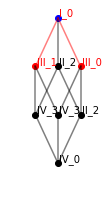

In [12]:
M.enhancement_diagram(triple, 'enhancement_F2.png')

## More complicated example

In this section we consider a more complicated example.

In [13]:
vertices=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 2], [-1, 1, -1, -1], [1, -1, -1, -1], [-1, -1, -1, 0]]

In [14]:
X = fiberpolytope(vertices)

In [15]:
X.h11

5

Are there any 2d subpolytopes?

In [16]:
X.find_subpolytopes()

[array([[ 0,  0,  1,  0],
        [ 0,  0,  1,  2],
        [ 0,  0, -1, -1],
        [ 0,  0,  0,  0],
        [ 0,  0,  1,  1]]), array([[-1,  1, -1, -1],
        [ 1, -1, -1, -1],
        [ 0,  0, -1, -1],
        [ 0,  0,  0,  0],
        [ 0,  0,  1,  1]])]

what if we want to study a specific triangulation in particular?

In [17]:
all_t = X.PC.triangulations_list()

pick a specific triangulation

In [18]:
all_t[1]

(<0,1,2,7,8>, <0,1,2,8,9>, <0,1,3,7,8>, <0,1,3,8,9>, <0,2,5,7,8>, <0,2,5,8,9>, <0,3,5,7,8>, <0,3,5,8,9>, <1,2,4,7,8>, <1,2,4,8,9>, <1,3,4,7,8>, <1,3,4,8,9>, <2,4,6,7,8>, <2,4,6,8,9>, <2,5,6,7,8>, <2,5,6,8,9>, <3,4,6,7,8>, <3,4,6,8,9>, <3,5,6,7,8>, <3,5,6,8,9>)

In [19]:
X.set_triangulation(all_t[1])

fiberpolytope:WARNING:TV is not smooth.


Check the Kähler cone

In [20]:
X.J

[[1/2*x5 + 1/2*x6 + x7 + 1/2*x8 - 1/2*x9],
 [x5 + x6 + x7],
 [x6 + x7],
 [x7],
 [x5 + x6 + 2*x7 + x8],
 [x5 + x7]]

which turns out to be non simplicial. We can compute the triple intersection numbers

In [21]:
triple = X.triple_intersection()
triple

array([[[ 0,  2,  1,  0,  2,  1],
        [ 2,  2,  2,  2,  8,  2],
        [ 1,  2,  1,  1,  5,  2],
        [ 0,  2,  1,  0,  2,  1],
        [ 2,  8,  5,  2, 10,  5],
        [ 1,  2,  2,  1,  5,  1]],

       [[ 2,  2,  2,  2,  8,  2],
        [ 2,  0,  0,  0,  4,  0],
        [ 2,  0,  0,  0,  4,  0],
        [ 2,  0,  0,  0,  4,  0],
        [ 8,  4,  4,  4, 16,  4],
        [ 2,  0,  0,  0,  4,  0]],

       [[ 1,  2,  1,  1,  5,  2],
        [ 2,  0,  0,  0,  4,  0],
        [ 1,  0,  0,  0,  2,  0],
        [ 1,  0,  0,  0,  2,  0],
        [ 5,  4,  2,  2, 10,  4],
        [ 2,  0,  0,  0,  4,  0]],

       [[ 0,  2,  1,  0,  2,  1],
        [ 2,  0,  0,  0,  4,  0],
        [ 1,  0,  0,  0,  2,  0],
        [ 0,  0,  0,  0,  0,  0],
        [ 2,  4,  2,  0,  4,  2],
        [ 1,  0,  0,  0,  2,  0]],

       [[ 2,  8,  5,  2, 10,  5],
        [ 8,  4,  4,  4, 16,  4],
        [ 5,  4,  2,  2, 10,  4],
        [ 2,  4,  2,  0,  4,  2],
        [10, 16, 10,  4, 20, 10],
      

and find Kollar divisors

In [22]:
Kollar = X.find_kollar()
Kollar

fiberpolytope:INFO:The following divisors satisfy the three necessary Kollar conditions:
 [[1/2*x5 + 1/2*x6 + x7 + 1/2*x8 - 1/2*x9], [x5 + x6 + x7], [x6 + x7], [x7], [x5 + x7]]


[[1/2*x5 + 1/2*x6 + x7 + 1/2*x8 - 1/2*x9],
 [x5 + x6 + x7],
 [x6 + x7],
 [x7],
 [x5 + x7]]

How many of these are actually distinct?

In [23]:
for d in Kollar:
    # double check
    print(X.is_kollar(d))
    # compute intersection numbers:
    intersections = []
    for j in X.J:
        intersections += [X.TV.integrate(X.c1*d*d*j)]
    print(d, intersections)

True
[1/2*x5 + 1/2*x6 + x7 + 1/2*x8 - 1/2*x9] [0, 2, 1, 0, 2, 1]
True
[x5 + x6 + x7] [2, 0, 0, 0, 4, 0]
True
[x6 + x7] [1, 0, 0, 0, 2, 0]
True
[x7] [0, 0, 0, 0, 0, 0]
True
[x5 + x7] [1, 0, 0, 0, 2, 0]


1. There appear to be only two linear independet intersection numbers 
    1. [0, 2, 1, 0, 2, 1]
    2. [1, 0, 0, 0, 2, 0].
2. [x7] corresponds to a K3 fibration.
3. This is in line with the observations of two distinct 2d subpolytopes.

Let's and make an enhancement diagram and study the fibrations from that perspective:

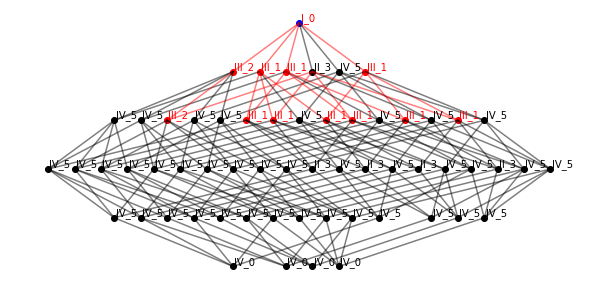

In [24]:
X.enhancement_diagram(triple, 'enhancement_h11=5.png')